In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-poster')
from numpy.fft import fft, ifft

Code for DFT

In [2]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)
x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

In [3]:
%timeit dft(x)
%timeit np.fft.fft(x)

161 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.9 µs ± 3.87 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Code for FFT

In [4]:
def FFT(x):
    N = len(x)
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X
    
def gen_sig(sr):
    ts = 1.0/sr
    t = np.arange(0,1,ts)
    freq = 1.
    x = 3*np.sin(2*np.pi*3*freq*t)+np.sin(2*np.pi*2*freq*t)+0.5*np.sin(2*np.pi*5*freq*t)
    return x

In [5]:

sr = 16
fft_output= FFT(gen_sig(sr))

c:\Users\arjun\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


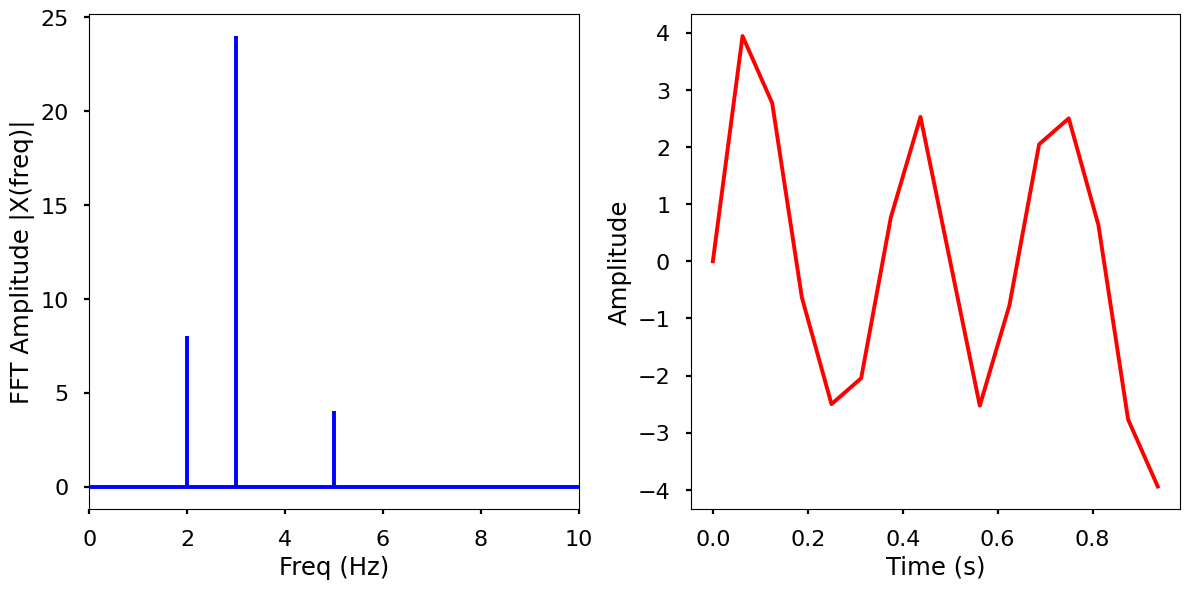

In [6]:
X = fft_output
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
ts = 1.0/sr
t = np.arange(0,1,ts)

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()